In [1]:
import cv2
import tifffile as tifi
import matplotlib.pyplot as plt

In [2]:
img = tifi.imread('B22-25-HP.tiff')

In [18]:
img_res = cv2.resize(img, (int(img.shape[1]*0.1),int(img.shape[0]*0.1)))

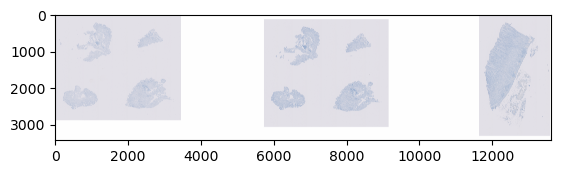

In [4]:
plt.imshow(img_res)

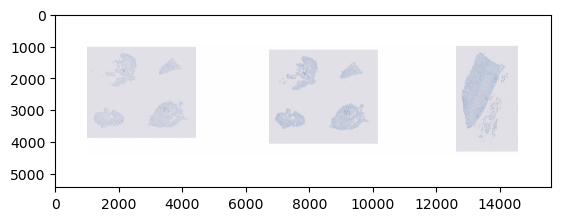

In [19]:
#white pixel padding

img_pad = cv2.copyMakeBorder(img_res, 1000, 1000, 1000, 1000, cv2.BORDER_CONSTANT, value=[255,255,255])

plt.imshow(img_pad)


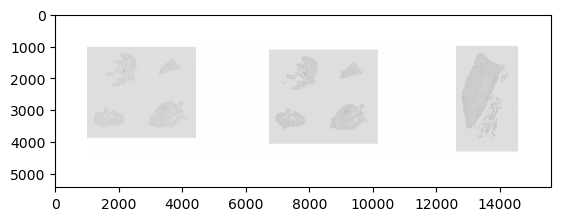

In [21]:
#convert to hsv and obtain gray channel
hsv = cv2.cvtColor(img_pad, cv2.COLOR_BGR2HSV)
gray = hsv[:,:,2]

plt.imshow(gray, cmap='gray')

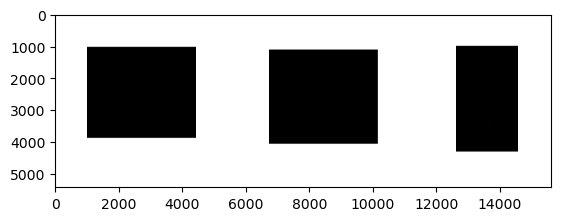

In [22]:
_, binary_mask = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY)

plt.imshow(binary_mask, cmap='gray')

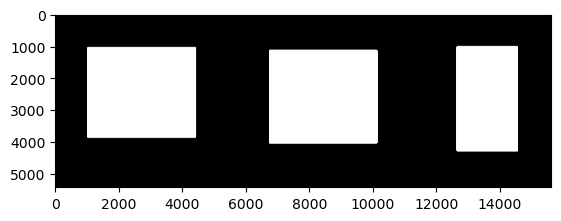

In [28]:
#inverse image
binary_mask_inv = cv2.bitwise_not(binary_mask)

plt.imshow(binary_mask_inv, cmap='gray')


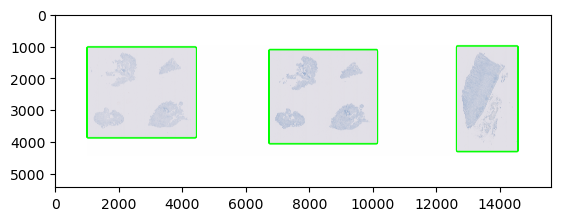

In [31]:
contours, _ = cv2.findContours(binary_mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#obtain the top 3 biggest contours
copy = img_pad.copy()
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:4]

#draw the contours on the original image
cv2.drawContours(copy, contours, -1, (0,255,0), 50)

plt.imshow(copy)


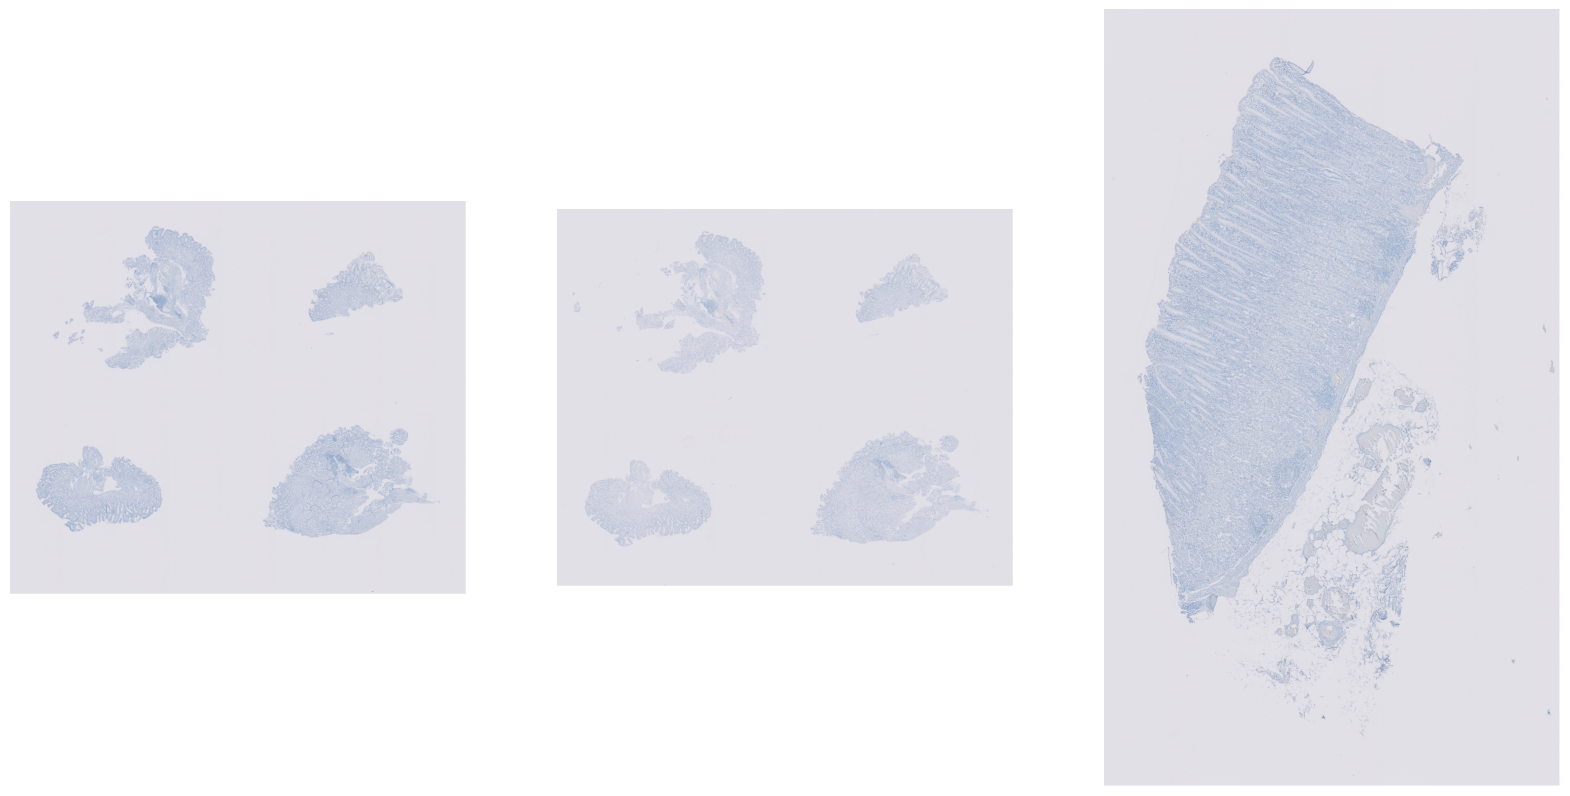

In [32]:
#crop images
cropped = []
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    crop = img_pad[y:y+h, x:x+w]
    cropped.append(crop)

#plot them
fig, ax = plt.subplots(1, len(cropped), figsize=(20,20))
for i in range(len(cropped)):
    ax[i].imshow(cropped[i])
    ax[i].axis('off')
plt.show()


In [33]:
def obtain_images(img, num = 3):
    img_pad = cv2.copyMakeBorder(img, 1000, 1000, 1000, 1000, cv2.BORDER_CONSTANT, value=[255,255,255])
    gray = cv2.cvtColor(img_pad, cv2.COLOR_BGR2HSV)[:,:,2]
    _, binary_mask = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY)
    binary_mask_inv = cv2.bitwise_not(binary_mask)
    contours, _ = cv2.findContours(binary_mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #obtain the top 3 biggest contours
    copy = img_pad.copy()
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:num]

    cropped = []
    for i in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[i])
        crop = img_pad[y:y+h, x:x+w]
        cropped.append(crop)
    
    return cropped



In [34]:
c = obtain_images(img_res, 3)

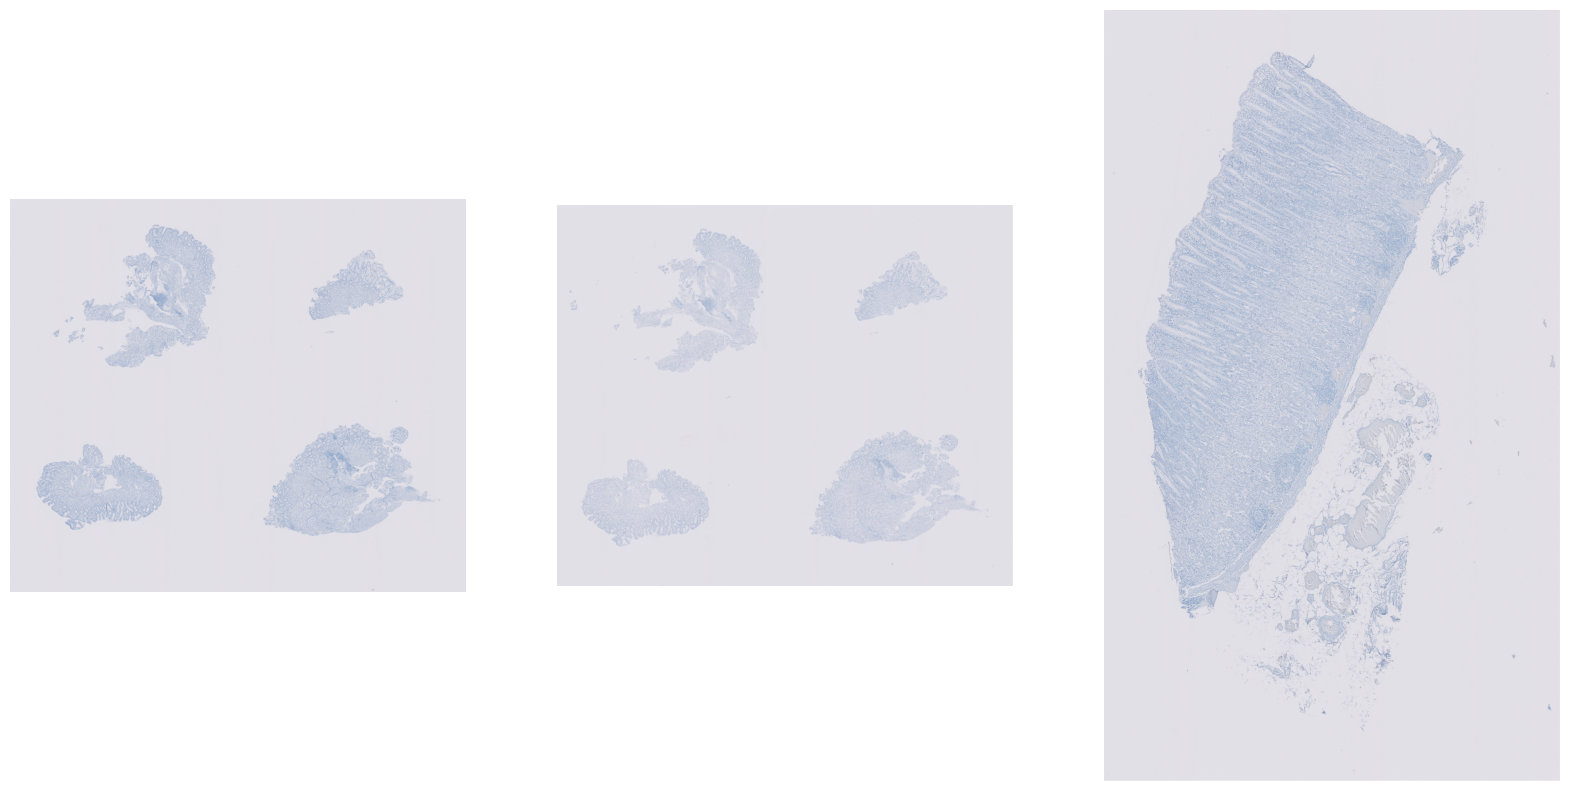

In [35]:
fig, ax = plt.subplots(1, len(c), figsize=(20,20))
for i in range(len(c)):
    ax[i].imshow(c[i])
    ax[i].axis('off')
plt.show()